**1. Importing the libraries & Load the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train 2.csv')

In [ ]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


**2. Data cleaning and Processing**

In [ ]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(913000, 4)

In [ ]:
# data['month'] = data['date'].dt.month
# extracting year from column of dates in the format 2010-01-31.
# year = df["date"].values
# year = [my_str.split("-")[0] for my_str in year]
# df["year"] = year

In [ ]:
# 15-01-2013
df1 = df
date = df1['date'].values
month = [my_str.split('-')[1] for my_str in date]
year = [my_str.split("-")[0] for my_str in date]
df1['month'] = month
df1['year'] = year

In [ ]:
df1.columns

Index(['date', 'store', 'item', 'sales', 'month', 'year'], dtype='object')

In [ ]:
df1.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df1.item.value_counts()

50    18260
13    18260
23    18260
22    18260
21    18260
20    18260
19    18260
18    18260
17    18260
16    18260
15    18260
14    18260
12    18260
49    18260
11    18260
10    18260
9     18260
8     18260
7     18260
6     18260
5     18260
4     18260
3     18260
2     18260
24    18260
25    18260
26    18260
27    18260
48    18260
47    18260
46    18260
45    18260
44    18260
43    18260
42    18260
41    18260
40    18260
39    18260
38    18260
37    18260
36    18260
35    18260
34    18260
33    18260
32    18260
31    18260
30    18260
29    18260
28    18260
1     18260
Name: item, dtype: int64

In [ ]:
df1.store.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64

In [ ]:
df1.month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [ ]:
df1.month

0         01
1         01
2         01
3         01
4         01
          ..
912995    12
912996    12
912997    12
912998    12
912999    12
Name: month, Length: 913000, dtype: object

In [ ]:
df1['month']=[mon.lstrip('0') for mon in df1.month]

In [ ]:
df1.month.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype=object)

In [ ]:
df1.shape

(913000, 6)

In [ ]:
basket = df1.groupby(['month','store','item'])['sales'].sum()
# basket.head(10)

In [ ]:
basket = basket.unstack()
basket.head(15)

item           1      2     3     4     5   ...     46    47     48    49     50
month store                                 ...                                 
1     1      2125   5591  3503  2101  1793  ...   5677  2071   4936  2803   6257
      2      2956   7865  5011  2924  2544  ...   7821  2969   6973  4020   8869
      3      2637   6963  4456  2642  2228  ...   6978  2631   6077  3502   7923
      4      2411   6463  4118  2440  2102  ...   6619  2460   5673  3280   7317
      5      1763   4753  2910  1692  1450  ...   4709  1778   4110  2322   5335
      6      1722   4665  2993  1724  1454  ...   4761  1758   4060  2326   5295
      7      1569   4368  2548  1650  1429  ...   4284  1629   3708  2123   4687
      8      2742   7474  4715  2824  2337  ...   7566  2856   6529  3733   8450
      9      2453   6632  4062  2331  2023  ...   6593  2431   5684  3186   7302
      10     2609   7087  4353  2563  2069  ...   6945  2573   6065  3414   7700
10    1      3045   8012  4974  2987  2507  ...   8039  3031   6968  4057   8972
      2      4414  11591  7046  4253  3493  ...  11320  4525  10004  5696  12906
      3      3813  10065  6342  3807  3110  ...  10167  3812   8671  4944  11400
      4      3465   9332  5703  3457  2801  ...   9411  3452   8260  4702  10429
      5      2566   6600  4209  2589  2126  ...   6687  2536   5946  3431   7612

[15 rows x 50 columns]

In [ ]:
df1.columns

Index(['date', 'store', 'item', 'sales', 'month', 'year'], dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
 4   month   913000 non-null  object
 5   year    913000 non-null  object
dtypes: int64(3), object(3)
memory usage: 41.8+ MB


In [ ]:
df1['month'] = df['month'].astype('int')
df1['year'] = df['year'].astype('int')

In [ ]:
df2 = df1.groupby(['month','year']).agg({'item': ['sum'],'sales': ['sum']}).reset_index()
#rename columns 
df2.columns = ['month','year','item_sum', 'sales_sum']
df2

,month,year,item_sum,sales_sum
0,1,2013,395250,454904
1,1,2014,395250,525987
2,1,2015,395250,552513
3,1,2016,395250,602439
4,1,2017,395250,617306
5,2,2013,357000,459417
6,2,2014,357000,529117
7,2,2015,357000,551317
8,2,2016,369750,614957
9,2,2017,357000,621369


In [ ]:
df3 = df1.groupby(['item','month','year']).agg({'item': ['sum'],'sales': ['sum']}).reset_index()
#rename columns 
df3.columns = ['item','month','year','item_sum', 'sales_sum']
df3.head(20)

,item,month,year,item_sum,sales_sum
0,1,1,2013,310,3794
1,1,1,2014,310,4323
2,1,1,2015,310,4626
3,1,1,2016,310,5008
4,1,1,2017,310,5236
5,1,2,2013,280,3863
6,1,2,2014,280,4391
7,1,2,2015,280,4633
8,1,2,2016,290,5160
9,1,2,2017,280,5299


In [ ]:
df3[df3['item']==1]

,item,month,year,item_sum,sales_sum
0,1,1,2013,310,3794
1,1,1,2014,310,4323
2,1,1,2015,310,4626
3,1,1,2016,310,5008
4,1,1,2017,310,5236
5,1,2,2013,280,3863
6,1,2,2014,280,4391
7,1,2,2015,280,4633
8,1,2,2016,290,5160
9,1,2,2017,280,5299


In [ ]:
df3[(df3['item']==1) & (df3['month']<=3) & (df3['year']==2013)]

,item,month,year,item_sum,sales_sum
0,1,1,2013,310,3794
5,1,2,2013,280,3863
10,1,3,2013,310,5190


In [ ]:
df4 = df3[(df3['item']==1) & (df3['month']<=3) & (df3['year']==2013)].agg({'item_sum': ['sum'],'sales_sum': ['sum']}).reset_index()
df4

,index,item_sum,sales_sum
0,sum,900,12847


In [ ]:
df3.columns

Index(['item', 'month', 'year', 'item_sum', 'sales_sum'], dtype='object')

In [ ]:
df_new1=pd.DataFrame()
df_new1

""


In [ ]:
def items_sold(yrno,itemno,monthno):
  if(monthno==3):
    df_new = df3[(df3['item']==itemno) & ((1 <= df3['month']) & (df3['month'] < 4)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  elif(monthno==6):
    df_new = df3[(df3['item']==itemno) & ((4 <= df3['month']) & (df3['month'] < 7)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  elif(monthno==9):
    df_new = df3[(df3['item']==itemno) & ((7 <= df3['month']) & (df3['month'] < 10)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  else:
    df_new = df3[(df3['item']==itemno) & ((10 <= df3['month']) & (df3['month'] <= 12)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})

# df_new['item_sum_new']=df_new['item_sum']
  df_new['year']=yrno
  df_new['itemnum']=itemno
  df_new = pd.concat([df_new,df_new1])
  return df_new

yr_list = df3['year'].unique().tolist()
item_list = df3['item'].unique().tolist()
mon_list = df3['month'].unique().tolist()
for yr in yr_list:
  for item in item_list:
    for mon in mon_list:
      if(mon<=3):
        monthval=3
      elif(mon>3 and mon<=6):
        monthval=6
      elif(mon>6 and mon<=9):
        monthval=9
      else:monthval=12
      df_new1 = items_sold(yr,item,monthval)
df_new1
df_new1.sort_values(by ='year', ascending = 1)

,item_sum,sales_sum,year,itemnum
sum,900,12847,2013,1
sum,30600,15054,2013,34
sum,30600,15054,2013,34
sum,30940,22121,2013,34
sum,30940,22121,2013,34
...,...,...,...,...
sum,15640,31529,2017,17
sum,15640,31529,2017,17
sum,15640,31529,2017,17
sum,16200,66446,2017,18


In [ ]:
df_new2 = df_new1.iloc[:,0:].reset_index()
df_new2.columns

Index(['index', 'item_sum', 'sales_sum', 'year', 'itemnum'], dtype='object')

In [ ]:
df_new2.head()

,index,item_sum,sales_sum,year,itemnum
0,sum,46000,62925,2017,50
1,sum,46000,62925,2017,50
2,sum,46000,62925,2017,50
3,sum,46000,78899,2017,50
4,sum,46000,78899,2017,50


In [ ]:
df_new2.drop(columns=['index'],inplace=True)

In [ ]:
df_new2.head()

,item_sum,sales_sum,year,itemnum
0,46000,62925,2017,50
1,46000,62925,2017,50
2,46000,62925,2017,50
3,46000,78899,2017,50
4,46000,78899,2017,50


In [ ]:
df_new2.drop_duplicates(inplace=True)

In [ ]:
df_new2.head()

,item_sum,sales_sum,year,itemnum
0,46000,62925,2017,50
3,46000,78899,2017,50
6,45500,76149,2017,50
9,45000,51966,2017,50
12,45080,27934,2017,49


In [ ]:
df_new3= df_new2[(df_new2['item_sum'] != 0) & (df_new2['sales_sum'] != 0)]
df_new3

,item_sum,sales_sum,year,itemnum
0,46000,62925,2017,50
3,46000,78899,2017,50
6,45500,76149,2017,50
9,45000,51966,2017,50
12,45080,27934,2017,49
...,...,...,...,...
2985,1800,34650,2013,2
2988,920,15764,2013,1
2991,920,19292,2013,1
2994,910,18820,2013,1


In [ ]:
df_new3.sort_values(by ='year', ascending = 1)

,item_sum,sales_sum,year,itemnum
2997,900,12847,2013,1
2613,29700,40403,2013,33
2610,30030,59466,2013,33
2607,30360,61952,2013,33
2604,30360,49517,2013,33
...,...,...,...,...
387,16560,101330,2017,18
384,16560,81081,2017,18
381,17100,31996,2017,19
411,14720,30893,2017,16


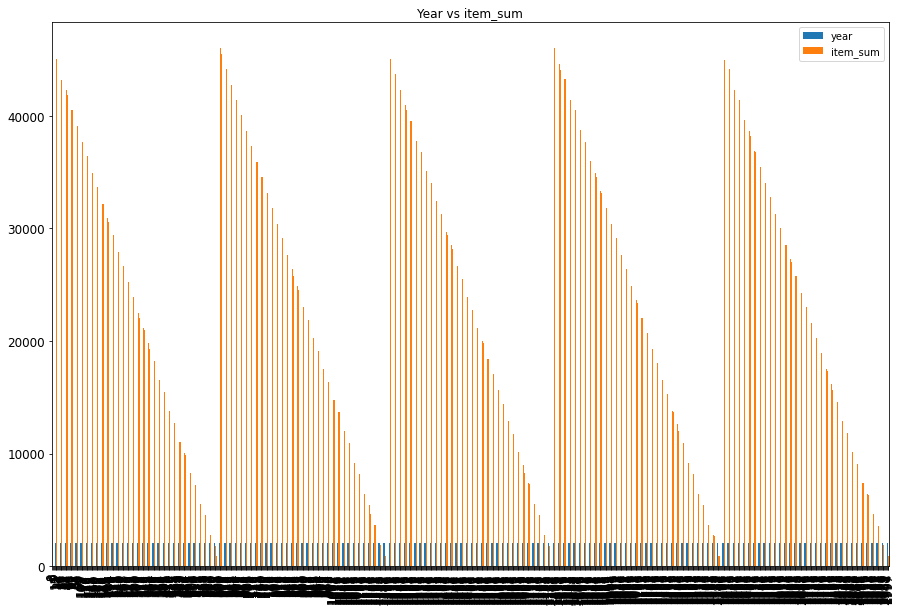

In [ ]:
#df_new3.plot(kind='bar')
df_new3[['year','item_sum']].plot(kind='bar', title ="Year vs item_sum", figsize=(15, 10), legend=True, fontsize=12)

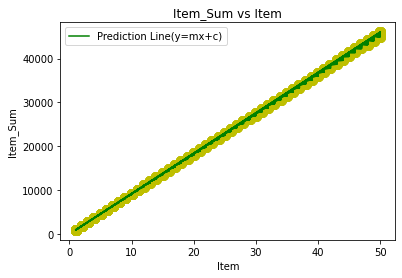

In [ ]:
X = df_new3['itemnum'].values
y = df_new3['item_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Item')
plt.ylabel('Item_Sum')
plt.title('Item_Sum vs Item')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()

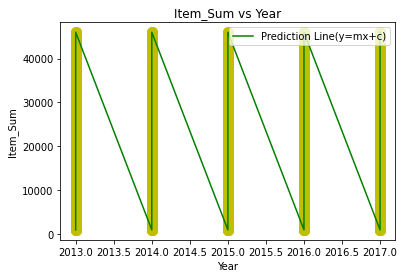

In [ ]:
X = df_new3['year'].values
y = df_new3['item_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Year')
plt.ylabel('Item_Sum')
plt.title('Item_Sum vs Year')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()

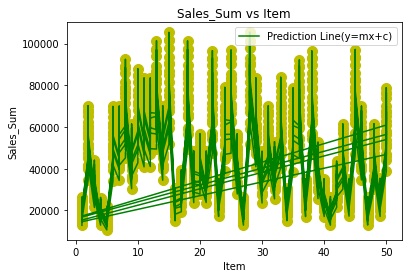

In [ ]:
X = df_new3['itemnum'].values
y = df_new3['sales_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Item')
plt.ylabel('Sales_Sum')
plt.title('Sales_Sum vs Item')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()

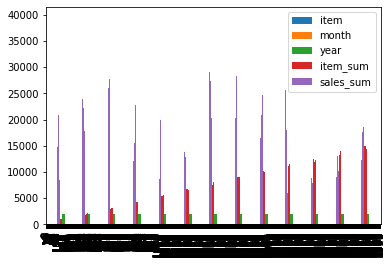

In [ ]:
df3.plot(kind='bar')

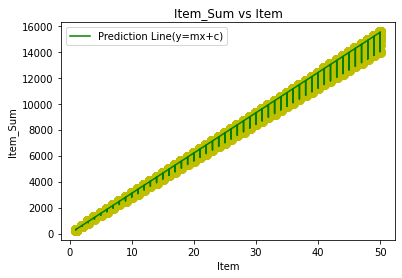

In [ ]:
X = df3['item'].values
y = df3['item_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Item')
plt.ylabel('Item_Sum')
plt.title('Item_Sum vs Item')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()

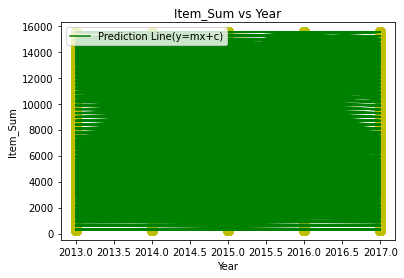

In [ ]:
X = df3['year'].values
y = df3['item_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Year')
plt.ylabel('Item_Sum')
plt.title('Item_Sum vs Year')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()


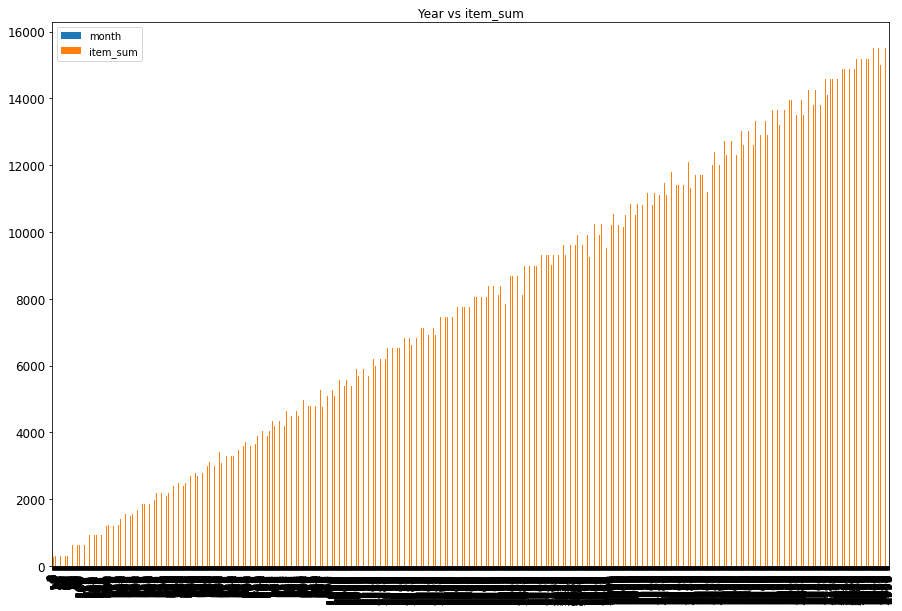

In [ ]:
df3[['month','item_sum']].plot(kind='bar', title ="month vs item_sum", figsize=(15, 10), legend=True, fontsize=12)

In [ ]:
df4 = df1.groupby(['item','year']).agg({'item': ['sum'],'sales': ['sum']}).reset_index()
#rename columns 
df4.columns = ['item','year','item_sum', 'sales_sum']
df4.head(20)

,item,year,item_sum,sales_sum
0,1,2013,3650,66723
1,1,2014,3650,76777
2,1,2015,3650,80507
3,1,2016,3660,87224
4,1,2017,3650,90153
5,2,2013,7300,178096
6,2,2014,7300,204809
7,2,2015,7300,213798
8,2,2016,7320,232440
9,2,2017,7300,240421


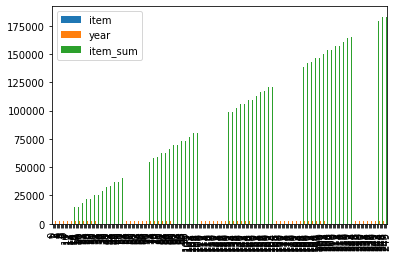

In [ ]:
df4[['item','year','item_sum']].plot(kind='bar')

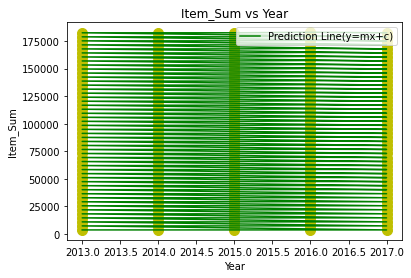

In [ ]:
X = df4['year'].values
y = df4['item_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Year')
plt.ylabel('Item_Sum')
plt.title('Item_Sum vs Year')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()